In [148]:
import pandas as pd

In [149]:
df = pd.read_excel('D:\\Py files\\Practice ML\\Linear Regression\\homeprice.xlsx')

In [150]:
df.columns

Index(['town', 'area', 'price'], dtype='object')

In [151]:
df.head()

,town,area,price
0,ctg,2600,550000
1,dhk,3000,565000
2,bar,3200,610000
3,ctg,3600,680000
4,dhk,4000,725000


In [152]:
df.town

0    ctg
1    dhk
2    bar
3    ctg
4    dhk
Name: town, dtype: object

In [153]:
df_dummies = pd.get_dummies(df.town)

In [154]:
merged = pd.concat([df, df_dummies], axis=1)

In [155]:
merged

,town,area,price,bar,ctg,dhk
0,ctg,2600,550000,0,1,0
1,dhk,3000,565000,0,0,1
2,bar,3200,610000,1,0,0
3,ctg,3600,680000,0,1,0
4,dhk,4000,725000,0,0,1


In [156]:
final = merged.drop('town', axis=1)

In [157]:
from sklearn.linear_model import LinearRegression

md = LinearRegression()

In [183]:
X = final.drop(['price'], axis=1)
X

,area,bar,ctg,dhk
0,2600,0,1,0
1,3000,0,0,1
2,3200,1,0,0
3,3600,0,1,0
4,4000,0,0,1


In [184]:
y = merged.price
y

0    550000
1    565000
2    610000
3    680000
4    725000
Name: price, dtype: int64

In [185]:
md.fit(X,y)

LinearRegression()

In [186]:
md.predict([[5000, 0,1,0]])

array([890499.99999996])

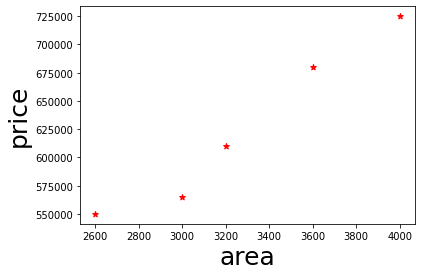

In [187]:
import matplotlib.pyplot as plt

plt.xlabel('area', fontsize= 25)
plt.ylabel('price',  fontsize= 25)
plt.scatter(final.area, final.price, color='red', marker='*')

In [188]:
md.score(X,y)

0.9899866488651534

In [189]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [197]:
df.town = le.fit_transform(df.town)
df

,town,area,price
0,1,2600,550000
1,2,3000,565000
2,0,3200,610000
3,1,3600,680000
4,2,4000,725000


In [207]:
X = df.drop(['price'], axis=1)
y= df.price
X


,town,area
0,1,2600
1,2,3000
2,0,3200
3,1,3600
4,2,4000


In [217]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(categorical_features=[0])

TypeError: __init__() got an unexpected keyword argument 'categorical_features'

In [213]:
X= ohe.fit_transform(X).toarray()
X

array([[1., 0., 0., 0., 0., 0.],
       [0., 1., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0., 1.]])

In [214]:
md.fit(X,y)

LinearRegression()